In [1]:
%load_ext autoreload
%autoreload 2

# Settings

In order to run the video to slides programm you need to make sure that following steps are done:

1. Download the video from zoom with the [chrome plugin](https://chrome.google.com/webstore/detail/zed-zoom-easy-downloader/pdadlkbckhinonakkfkdaadceojbekep?hl=en-GB)
2. Put the video in the `videos` folder in the root of the project
3. `Specify` the name of the video e.g. `"videos/00_tutorial.mp4"`
4. `Specify` the name of the output slides e.g. `"solution/00_tutorial.png"`
5. `Adjust` the view of the slides
6. Run the notebook and enjoy!
7. Optional: Use your favorite [pdf editor](https://www.ilovepdf.com/download/3zbf2p740wnp2nszhc4qn8ghdlsz4n7js4dyg3A0lp2n1zqbkmjz1jA8gb70cv6w4hyd6599A8kAx75yl5b4s90qwbxyxc4tjmj8bbvym9f5zrbsAgy3jy09s5kfbqs0lpn1m35lwsmyq386hhm76m3v4dz83tj8m648A40srxclkcchyjq1/35) to remove bad pages.


In [2]:
video_path = "videos/00_tutorial.mp4"
solution_path = "solutions/00_tutorial.pdf"

# Import


In [3]:
from lib.utils import frame_generator, get_image, slice_frame_generator,get_random_frame, save_frames
from lib.encoder import ImageEncoder
from functools import partial

model = ImageEncoder()
random_frame = get_random_frame(video_path)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  1%|▏         | 2000/147135 [00:00<00:55, 2597.23it/s]


# Adjust Image View 


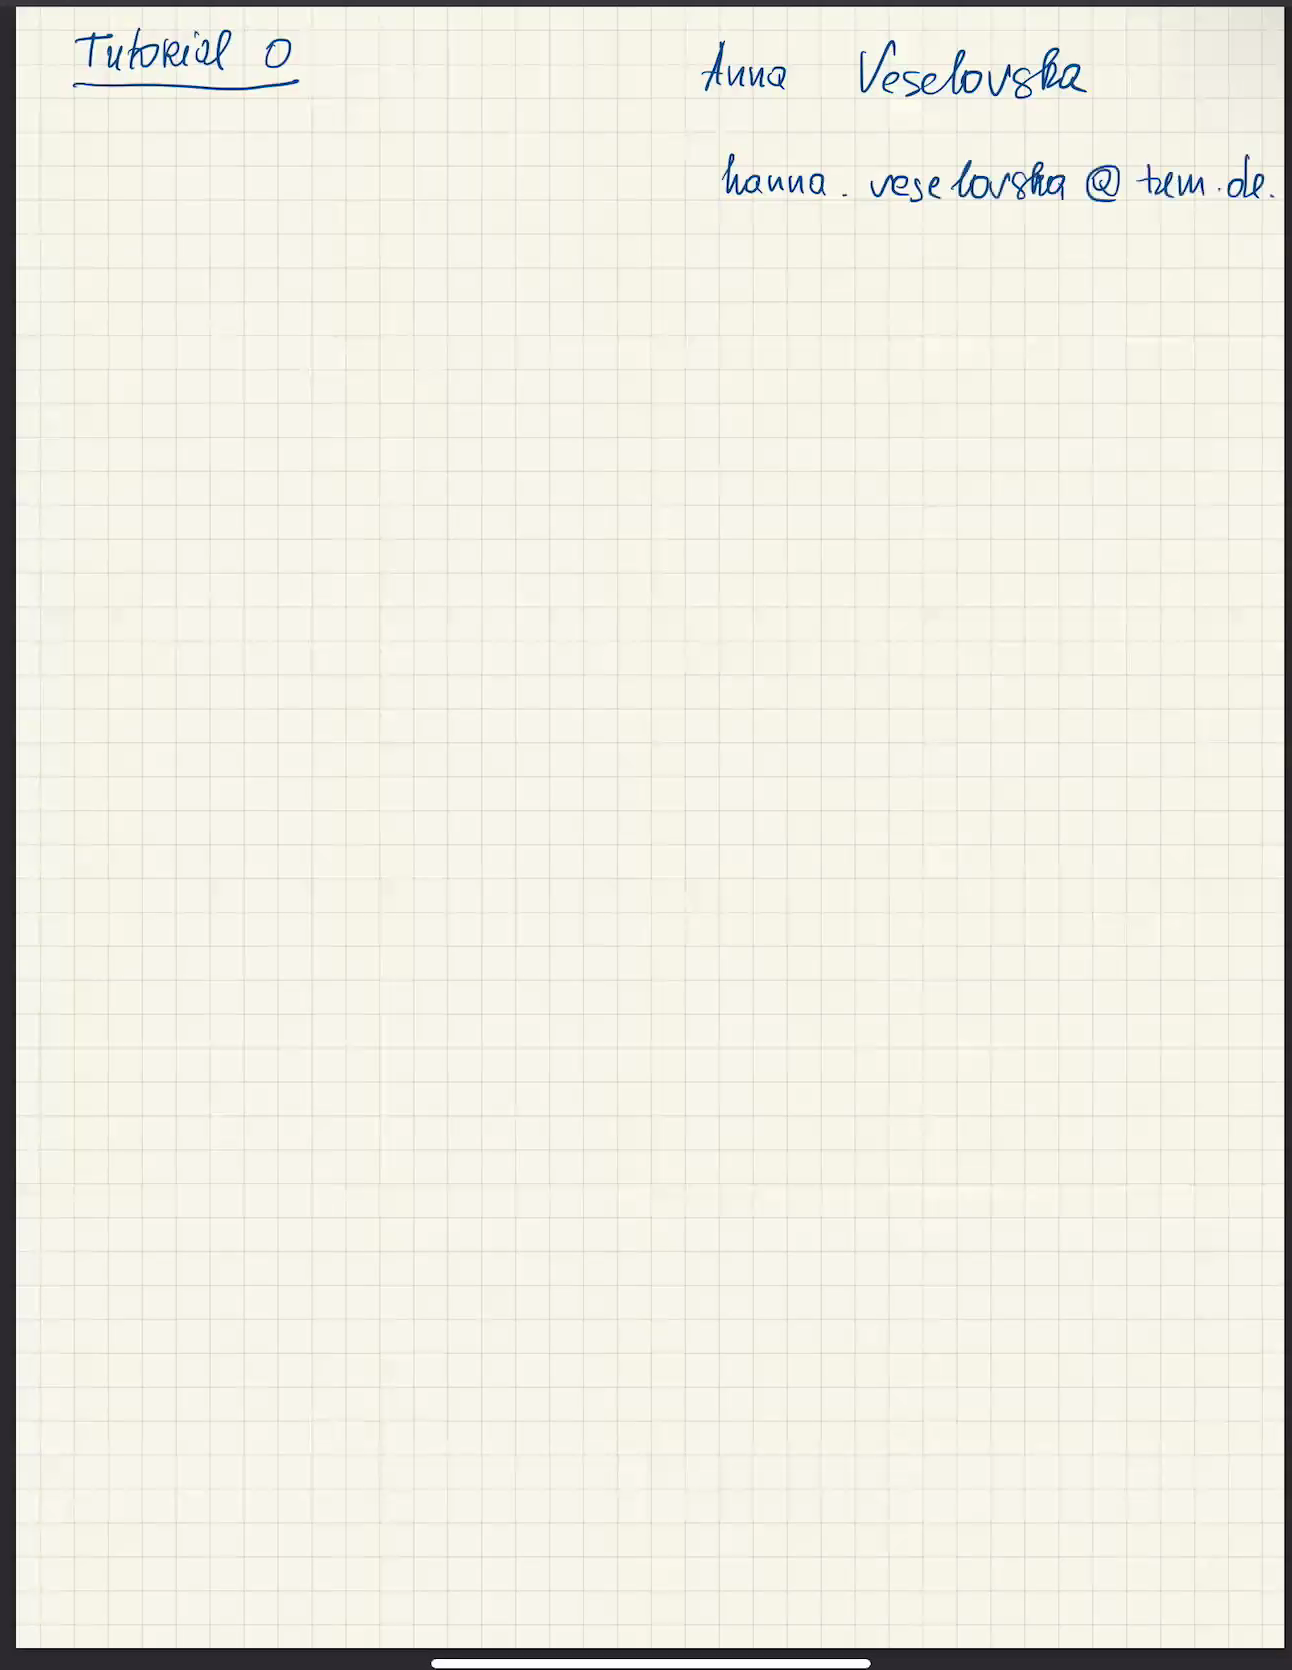

In [4]:
slice_frame = partial(
    slice_frame_generator,
    pleft=20,
    pright=350,
    ptop=240,
    pbottom=10,
)

get_image(slice_frame(random_frame))

In [7]:
from torch.nn.functional import cosine_similarity

similarity_threshold = 0.95
# set this to None when running on hole video
max_frames=None

frames = []
embeddings = []
simmilarities = []
slides = []

frames_iter = iter(frame_generator(video_path, max_frames=max_frames))
frames.append(slice_frame(next(frames_iter)))
embeddings.append(model.encode(frames[0]))

for i, frame in enumerate(frames_iter, 1):
    # calc the new embedding
    frames.append(slice_frame(frame))
    embeddings.append(model.encode(frames[i]))
    simmilarities.append(cosine_similarity(embeddings[i-1], embeddings[i]))

    if simmilarities[i-1] < similarity_threshold:
        slides.append(frames[i-1])
slides.append(frames[i])

 34%|███▍      | 50000/147135 [08:19<16:10, 100.05it/s]


# Save PDF

In [8]:
save_frames(slides, path=solution_path)